In [1]:
# traffic - Program to solve the generalized Burger  
# equation for the traffic at a stop light problem

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#* Select numerical parameters (time step, grid spacing, etc.).
method = input('Choose a numerical method, 1) FTCS; 2) Lax; 3) Lax-Wendroff :')
N = input('Enter the number of grid points: ')
L = 400       # System size (meters)
h = L/N       # Grid spacing for periodic boundary conditions
v_max = 25.    # Maximum car speed (m/s)
print 'Suggested timestep is ', h/v_max
tau = input('Enter time step (tau): ')
print 'Last car starts moving after ', (L/4)/(v_max*tau), 'steps'
nstep = input('Enter number of steps: ')
coeff = tau/(2*h)          # Coefficient used by all schemes
coefflw = tau**2/(2*h**2)  # Coefficient used by Lax-Wendroff

Choose a numerical method, 1) FTCS; 2) Lax; 3) Lax-Wendroff :3
Enter the number of grid points: 80
Suggested timestep is  0.2
Enter time step (tau): .2
Last car starts moving after  20.0 steps
Enter number of steps: 100


In [3]:
#* Set initial and boundary conditions
rho_max = 1.0                   # Maximum density
Flow_max = 0.25*rho_max*v_max   # Maximum Flow
Flow = np.empty(N)
cp = np.empty(N);  cm = np.empty(N)
# Initial condition is a square pulse from x = -L/4 to x = 0
rho = np.zeros(N)
for i in range(int(N/4),int(N/2)) :
  rho[i] = rho_max     # Max density in the square pulse

rho[int(N/2)] = rho_max/2   # Try running without this line

# Use periodic boundary conditions
ip = np.arange(N) + 1  
ip[N-1] = 0          # ip = i+1 with periodic b.c.
im = np.arange(N) - 1  
im[0] = N-1          # im = i-1 with periodic b.c.

#* Initialize plotting variables.
iplot = 1
xplot = (np.arange(N)-1/2.)*h - L/2.    # Record x scale for plot
rplot = np.empty((N,nstep+1))
tplot = np.empty(nstep+1)
rplot[:,0] = np.copy(rho)   # Record the initial state
tplot[0] = 0                # Record the initial time (t=0)

In [4]:
#* Loop over desired number of steps.
for istep in range(nstep) :

    #* Compute the flow = (Density)*(Velocity)
    Flow[:] = rho[:] * (v_max*(1 - rho[:]/rho_max))
  
    #* Compute new values of density using  
    #  FTCS, Lax or Lax-Wendroff method.
    if method == 1 :      ### FTCS method ###
        rho[:] = rho[:] - coeff*( Flow[ip] - Flow[im] )
    elif method == 2 :    ### Lax method ###
        rho[:] = .5*( rho[ip] + rho[im] ) - coeff*( Flow[ip] - Flow[im] )
    else :                ### Lax-Wendroff method ###
        cp[:] = v_max*(1 - (rho[ip]+rho[:])/rho_max);
        cm[:] = v_max*(1 - (rho[:]+rho[im])/rho_max);
        rho[:] = rho[:] - coeff*( Flow[ip] - Flow[im] ) + coefflw*(
            cp[:]*(Flow[ip]-Flow[:]) - cm[:]*(Flow[:]-Flow[im]) )

    #* Record density for plotting.
    rplot[:,iplot] = np.copy(rho)
    tplot[iplot] = tau*istep
    iplot += 1

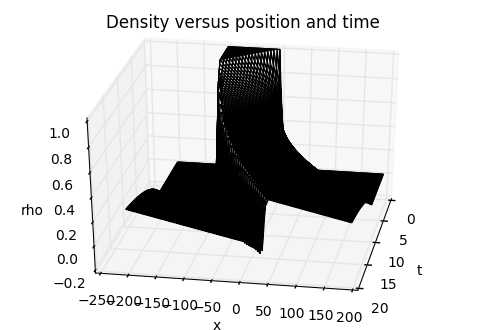

In [5]:
# %* Graph density versus position and time as wire-mesh plot

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection = '3d')
Tp, Xp = np.meshgrid(tplot[0:iplot], xplot)
ax.plot_surface(Tp, Xp, rplot[:,0:iplot], rstride=1, cstride=1, cmap=cm.gray)
ax.view_init(elev=30., azim=10.)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('rho')
ax.set_title('Density versus position and time')

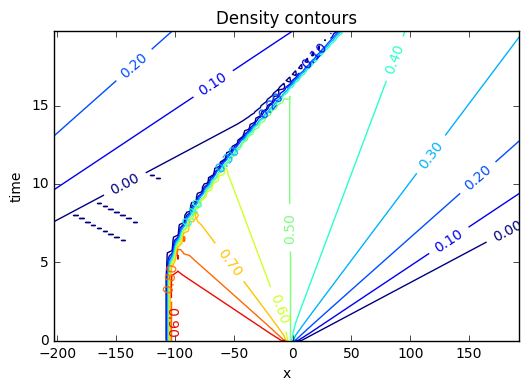

In [6]:
# %* Graph contours of density versus position and time.

levels = np.linspace(0., 1., num=11) 
ct = plt.contour(xplot, tplot, np.flipud(np.rot90(rplot)), levels) 
plt.clabel(ct, fmt='%1.2f') 
plt.xlabel('x')
plt.ylabel('time')
plt.title('Density contours')